In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Define positive and negative numbers
pos_points = np.array([(-2,3),(0,1),(2,-1)])
neg_points = np.array([(-2,1),(0,-1),(2,-3)])

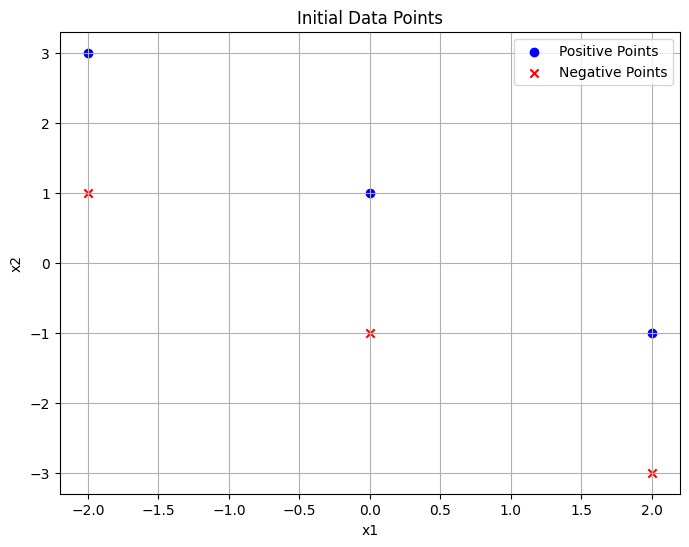

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(pos_points[:, 0], pos_points[:, 1], color='blue', marker='o', label='Positive Points')
plt.scatter(neg_points[:,0], neg_points[:, 1], color='red', marker='x', label='Negative Points')
plt.legend(loc='best')
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Initial Data Points')
plt.grid(True)
plt.show()

In [14]:
X = np.vstack((pos_points, neg_points))
Y = np.array([1]*len(pos_points) + [-1]*len(neg_points))
X, Y

(array([[-2,  3],
        [ 0,  1],
        [ 2, -1],
        [-2,  1],
        [ 0, -1],
        [ 2, -3]]),
 array([ 1,  1,  1, -1, -1, -1]))

Perceptron Algorithm

In [15]:
def perceptron(x, y, steps):
    w = np.zeros(x.shape[1])# Initialize weights to zero with proper dimensions
    b = 0
    for t in range(steps):
        current_w = w.copy()
        for i, xi in enumerate(x): # Iterate through each point in the dataset
            if y[i] * (np.dot(xi, w) + b) <= 0: # Check if the point is misclassified
                w += y[i] * xi
                b += y[i]
                break
        if np.array_equal(current_w, w): # Check if weights have not changed to stop iterations
            print(f"Converged after {t} iterations")
            break
        else:
            plot_decision_boundary(w, b, t+1)# Plotting decision boundary after each step
    return w, b

In [16]:
def plot_decision_boundary(w, b, step):
    plt.figure(figsize=(8,8))
    plt.scatter(pos_points[:,0], pos_points[:,1], color='blue', marker='o', label='Positive Points')
    plt.scatter(neg_points[:,0], neg_points[:,1], color='red', marker='x', label='Negative Points')
    plt.legend(loc='best')
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.title(f'Decision Boundary after {step} Iterations')
    plt.grid(True)
    plt.xlabel('x1')
    plt.ylabel('x2')
    x_values = np.linspace(-3,3,2)
    if w[1] != 0:  # Avoid division by zero
        y_values = -(w[0] * x_values + b) / w[1] # Calculate y values for the decision boundary w0*x1 + w1*x2 + b = 0
        plt.plot(x_values, y_values, color='green', label=f'Iteration {step}')
    else:
        plt.axvline(x=-b/w[0], color='green', label=f'Iteration {step}')

    plt.legend()
    plt.show()

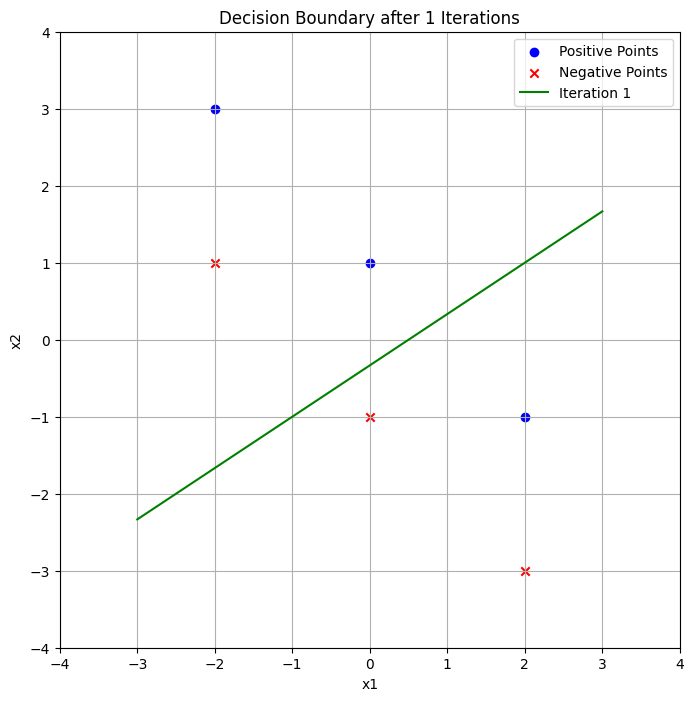

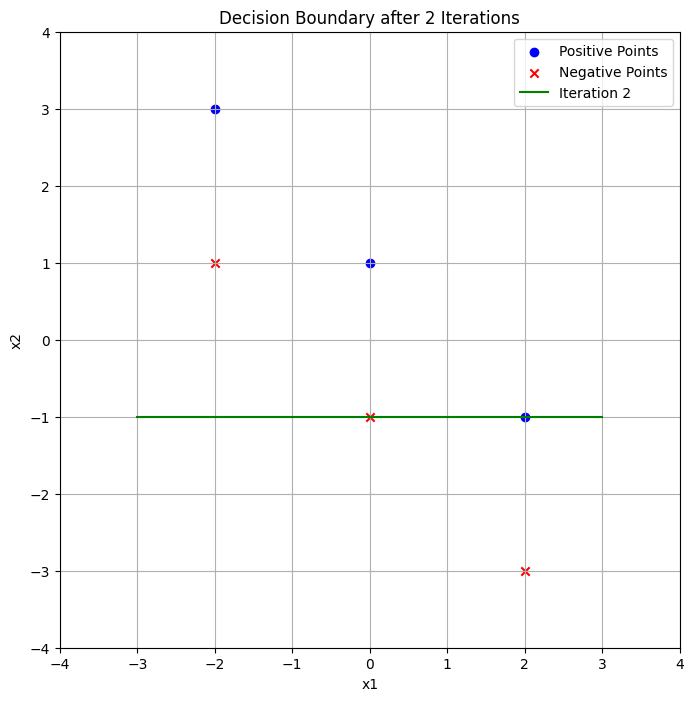

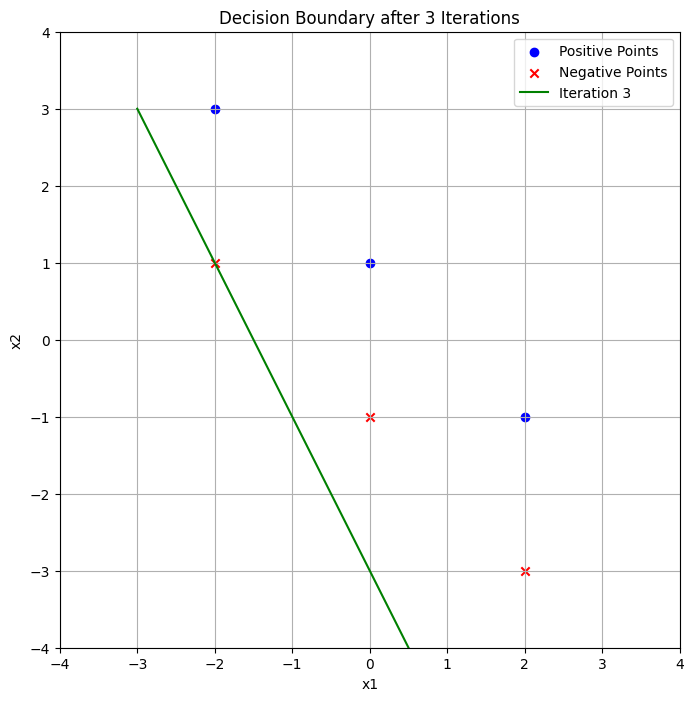

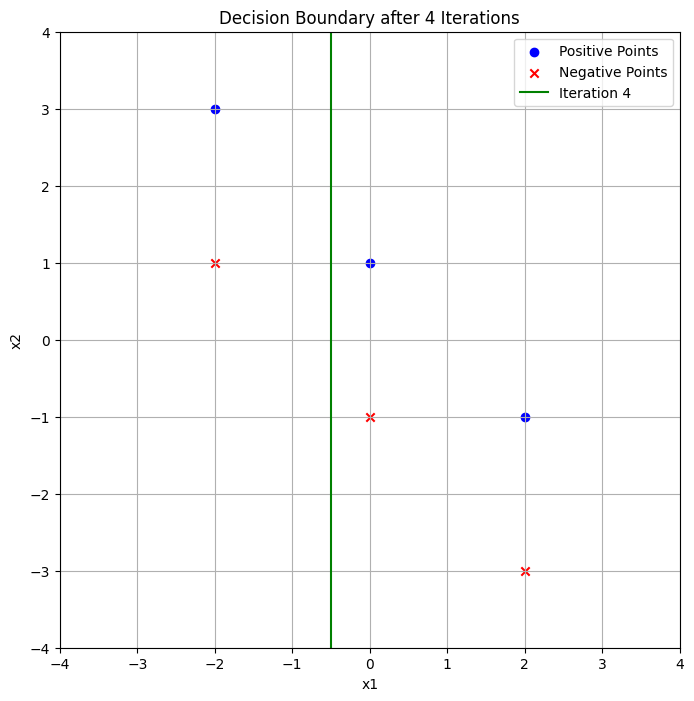

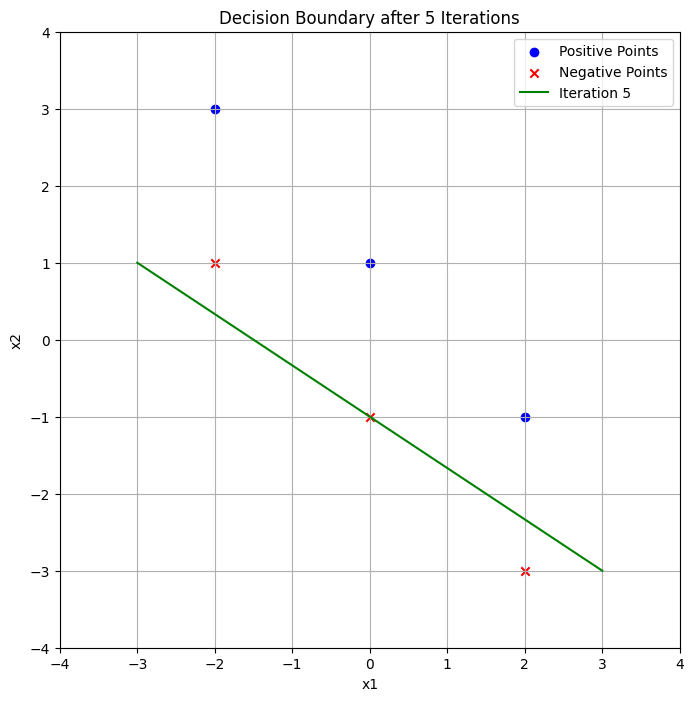

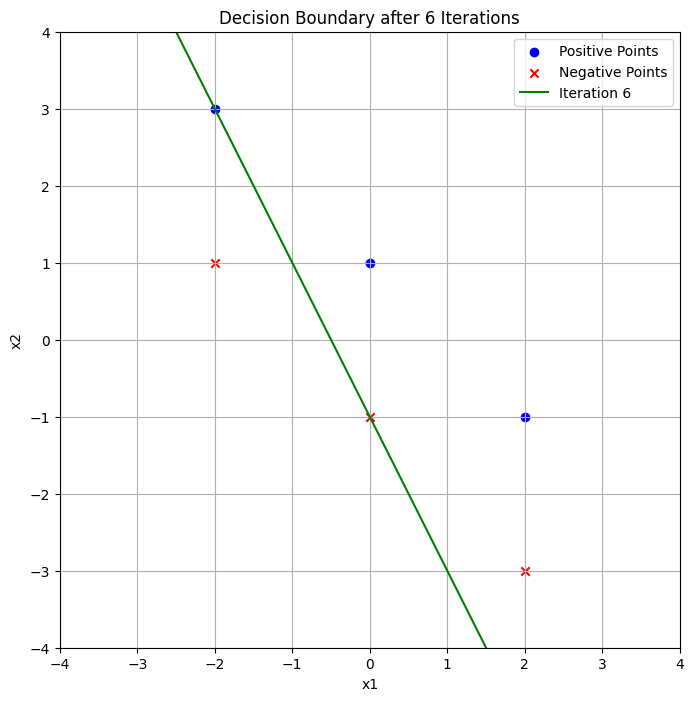

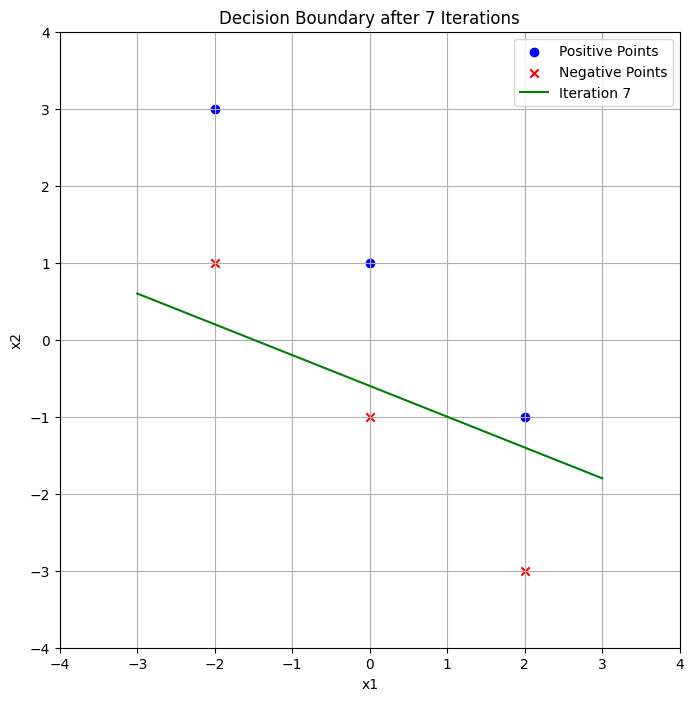

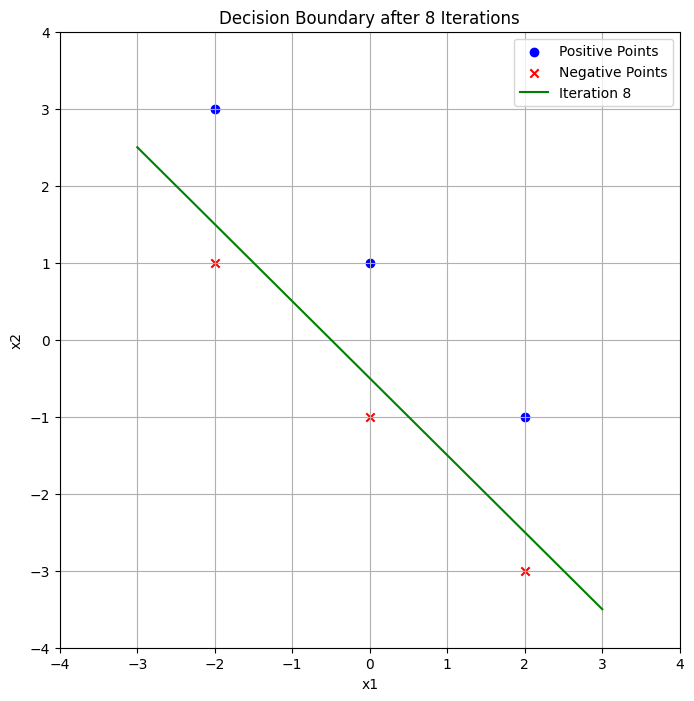

Converged after 8 iterations


In [17]:
w_final, b_final = perceptron(X, Y, steps=10)

In [18]:
#Finding margin of each points: g(x) = ( y * [W^T * x + b] ) / ||W||
def gamma(x, y, w, b):
    for i, xi in enumerate(x):
        min_gamma = np.inf
        g = y[i] * (np.dot(w, xi) + b) / np.linalg.norm(w)
        if g < min_gamma:
            min_gamma = g
    return min_gamma

In [9]:
min_gamma = gamma(X, Y, w_final, b_final)
print(f"Effective margin: {min_gamma}")

print(f"Final weights: {w_final}")
print(f"Final bias: {b_final}")

Effective margin: 0.35355339059327373
Final weights: [4. 4.]
Final bias: 2


In [19]:
def find_enclosing_radius(points):
    """
    Finds the radius of the smallest circle that encompasses all the points.

    Args:
        points (np.ndarray): A numpy array of points.

    Returns:
        float: The radius of the circle.
    """
    center = points.mean(axis=0)
    distances = np.linalg.norm(points - center, axis=1)
    radius = np.max(distances)
    return radius

radius = find_enclosing_radius(X)
print(f"Radius of the enclosing circle: {radius}")

Radius of the enclosing circle: 3.605551275463989


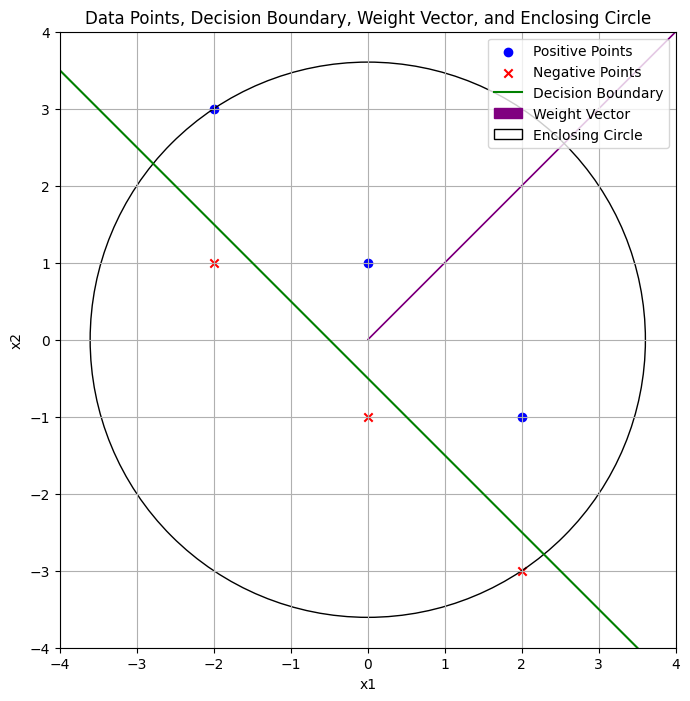

In [20]:
def plot_circle_and_w(X, w, radius):
    """
    Plots the data points, the decision boundary, the weight vector, and the enclosing circle.

    Args:
        X (np.ndarray): The data points.
        w (np.ndarray): The weight vector.
        radius (float): The radius of the enclosing circle.
    """
    # Calculate the center of the data points
    center = X.mean(axis=0)

    # Create a figure and axes
    plt.figure(figsize=(10, 8))

    # Plot positive and negative points
    plt.scatter(pos_points[:, 0], pos_points[:, 1], color='blue', marker='o', label='Positive Points')
    plt.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='x', label='Negative Points')

    # Plot the decision boundary
    x_values = np.linspace(-4, 4, 100)
    y_values = -(w[0] * x_values + b_final) / w[1]  # Use b_final which is already computed
    plt.plot(x_values, y_values, color='green', label='Decision Boundary')

    # Plot the weight vector
    plt.arrow(center[0], center[1], w[0], w[1], head_width=0.3, head_length=0.5, fc='purple', ec='purple', label='Weight Vector')

    # Plot the enclosing circle
    circle = plt.Circle(center, radius, edgecolor='black', facecolor='none', label='Enclosing Circle')
    plt.gca().add_patch(circle)

    # Set plot limits and labels
    plt.xlim(-4, 4)
    plt.ylim(-4, 4)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Data Points, Decision Boundary, Weight Vector, and Enclosing Circle')
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')  # Ensure circle is drawn as a circle
    plt.show()

# Call the function to plot
plot_circle_and_w(X, w_final, radius)

In [23]:
#Maximum number of iterations
mistakes = (radius**2) / min_gamma**2
print(f"Radius: {radius}")
print(f"Effective margin: {min_gamma}")
print(f"Maximum bound of iterations: {mistakes}")

Radius: 3.605551275463989
Effective margin: 0.35355339059327373
Maximum bound of iterations: 104.00000000000001
